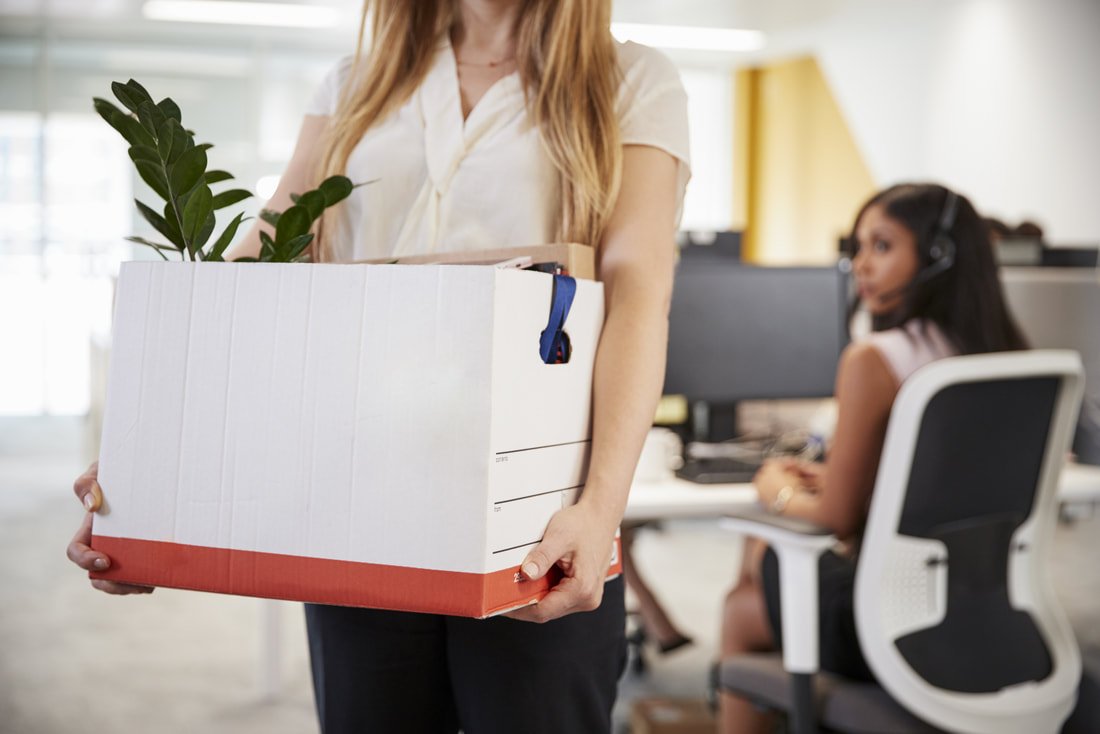

# Clean and Analyze Employee Exit Surveys

## 1. Introduction

In this project, we'll play the role of data analyst for the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia.

As data analyst, DETE and TAFE want us to combine the results for both surveys, to analyse them and to answer the following questions :

* Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
* Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

> You can find the TAFE exit survey [here](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey) and the survey for the DETE [here](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey). We've made some slight modifications to these datasets to make them easier to work with, including changing the encoding to UTF-8 (the original ones are encoded using cp1252.)

## 2. Colomns descriptions 


Below is a preview of a couple columns we'll work with from the `dete_survey.csv`:

* `ID`: An id used to identify the participant of the survey

* `SeparationType`: The reason why the person's employment ended

* `Cease Date`: The year or month the person's employment ended

* `DETE Start Date`: The year the person began employment with the DETE

Below is a preview of a couple columns we'll work with from the `tafe_survey.csv`:

* `Record ID`: An id used to identify the participant of the survey

* `Reason for ceasing employment`: The reason why the person's employment ended

* `LengthofServiceOverall. Overall Length of Service at Institute (in years)`: The length of the person's employment (in years)



## 3. Exploring the datasets

In [734]:
# Importing the libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns 

dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')


### dete_survey

In [735]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,A,A,N,N,N,A,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,N,N,N,N,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,A,A,N,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,N,N,N,A,A,N,N,A,A,A,A,A,A,A,A,A,A,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,A,A,N,N,D,D,N,A,A,A,A,A,A,SA,SA,D,D,A,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [736]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

In [737]:
dete_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In [738]:
def missing_perc(df):
    '''Prin the percentage of missing data in descending order'''
    return round(df.isnull().sum()/df.shape[0]*100, 2).sort_values(ascending=False)

missing_perc(dete_survey)

Torres Strait                          99.64
South Sea                              99.15
Aboriginal                             98.05
Disability                             97.20
NESB                                   96.11
Business Unit                          84.67
Classification                         44.65
Opportunities for promotion            10.58
Career Aspirations                      9.25
Wellness programs                       6.81
Coach                                   6.69
Further PD                              6.57
Workplace issue                         4.14
Feedback                                3.65
Health & Safety                         3.53
Gender                                  2.92
Professional Development                1.70
Stress and pressure support             1.46
Skills                                  1.34
Age                                     1.34
Peer support                            1.22
My say                                  1.22
Performanc

In [739]:
# Discover columns with big percentage of missing values
dete_survey['Business Unit'].value_counts(dropna=False)

NaN                                           696
Education Queensland                           54
Information and Technologies                   26
Training and Tertiary Education Queensland     12
Other                                          11
Human Resources                                 6
Corporate Strategy and Peformance               5
Early Childhood Education and Care              3
Policy, Research, Legislation                   2
Infrastructure                                  2
Finance                                         1
Indigenous Education and Training Futures       1
Corporate Procurement                           1
Calliope State School                           1
Pacific Pines SHS                               1
Name: Business Unit, dtype: int64

In [740]:
dete_survey['Classification'].value_counts(dropna=False)

NaN                  367
Primary              161
Secondary            124
A01-A04               66
AO5-AO7               46
Special Education     33
AO8 and Above         14
PO1-PO4                8
Middle                 3
Name: Classification, dtype: int64

In [741]:
dete_survey['Aboriginal'].value_counts(dropna=False)

NaN    806
Yes     16
Name: Aboriginal, dtype: int64

In [742]:
dete_survey.describe(include='all')

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
count,822.000000,822,822,822,822,817,455,822,126,817,822,822,822,822,822,822,822,822,822,822,822,822,822,822,822,822,822,822,808,735,816,788,817,815,810,813,812,813,811,767,746,792,768,814,812,816,813,766,793,798,811,16,3,7,23,32
unique,NaN,9,25,51,46,15,8,9,14,5,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,2,10,1,1,1,1,1
top,NaN,Age Retirement,2012,Not Stated,Not Stated,Teacher,Primary,Metropolitan,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,Female,61 or older,Yes,Yes,Yes,Yes,Yes
freq,NaN,285,344,73,98,324,161,135,54,434,800,742,788,733,761,806,765,794,795,788,760,754,785,710,794,605,735,605,413,242,335,357,467,359,342,349,401,396,372,345,246,348,293,399,400,436,401,253,386,573,222,16,3,7,23,32
mean,411.693431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,237.705820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,206.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,411.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,616.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [743]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Main Factor. Which of these was the main factor for leaving?,InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction,InstituteViews. Topic:2. I was given access to skills training to help me do my job better,InstituteViews. Topic:3. I was given adequate opportunities for personal development,InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%,InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had,InstituteViews. Topic:6. The organisation recognised when staff did good work,InstituteViews. Topic:7. Management was generally supportive of me,InstituteViews. Topic:8. Management was generally supportive of my team,InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me,InstituteViews. Topic:10. Staff morale was positive within the Institute,InstituteViews. Topic:11. If I had a workplace issue it was dealt with quickly,InstituteViews. Topic:12. If I had a workplace issue it was dealt with efficiently,InstituteViews. Topic:13. If I had a workplace issue it was dealt with discreetly,WorkUnitViews. Topic:14. I was satisfied with the quality of the management and supervision within my work unit,WorkUnitViews. Topic:15. I worked well with my colleagues,WorkUnitViews. Topic:16. My job was challenging and interesting,WorkUnitViews. Topic:17. I was encouraged to use my initiative in the course of my work,WorkUnitViews. Topic:18. I had sufficient contact with other people in my job,WorkUnitViews. Topic:19. I was given adequate support and co-operation by my peers to enable me to do my job,WorkUnitViews. Topic:20. I was able to use the full range of my skills in my job,WorkUnitViews. Topic:21. I was able to use the full range of my abilities in my job. ; Category:Level of Agreement; Question:YOUR VIEWS ABOUT YOUR WORK UNIT],WorkUnitViews. Topic:22. I was able to use the full range of my knowledge in my job,WorkUnitViews. Topic:23. My job provided sufficient variety,WorkUnitViews. Topic:24. I was able to cope with the level of stress and pressure in my job,WorkUnitViews. Topic:25. My job allowed me to balance the demands of work and family to my satisfaction,WorkUnitViews. Topic:26. My supervisor gave me adequate personal recognition and feedback on my performance,"WorkUnitViews. Topic:27. My working environment was satisfactory e.g. sufficient space, good lighting, suitable seating and working area",WorkUnitViews. Topic:28. I was given the opportunity to mentor and coach others in order for me to pass on my skills and knowledge prior to my cessation date,WorkUnitViews. Topic:29. There was adequate communication between staff in my unit,WorkUnitViews. Topic:30. Staff morale was positive within my work unit,Induction. Did you undertake Workplace Induction?,InductionInfo. Topic:Did you undertake a Corporate Induction?,InductionInfo. Topic:Did you undertake a Institute Induction?,InductionInfo. Topic: Did you undertake Team Induction?,InductionInfo. Face to Face Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. On-line Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. Induction Manual Topic:Did you undertake a Corporate Induction?,InductionInfo. Face to Face Topic:Did you undertake a Institute Induction?,InductionInfo. On-line Topic:Did you undertake a Institute Induction?

Following observations can be done based on preliminary exploration of dete_survey dataset:

* This is a big dataset that consists of 822 rows and 56 columns.
* All columns apart from ID are either object(string) or bool type.
* There are a lot of missing values (more than 40%) in `Business Unit` and `Classification` columns.
* In columns, where the percentage of missing values is more than 90%, either NaN basically means No.
* In some columns Not Stated is the most common value, but it is not represented as NaN.

### tafe_survey

In [744]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Main Factor. Which of these was the main factor for leaving?,InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction,InstituteViews. Topic:2. I was given access to skills training to help me do my job better,InstituteViews. Topic:3. I was given adequate opportunities for personal development,InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%,InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had,InstituteViews. Topic:6. The organisation recognised when staff did good work,InstituteViews. Topic:7. Management was generally supportive of me,InstituteViews. Topic:8. Management was generally supportive of my team,InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me,InstituteViews. Topic:10. Staff morale was positive within the Institute,InstituteViews. Topic:11. If I had a workplace issue it was dealt with quickly,InstituteViews. Topic:12. If I had a workplace issue it was dealt with efficiently,InstituteViews. Topic:13. If I had a workplace issue it was dealt with discreetly,WorkUnitViews. Topic:14. I was satisfied with the quality of the management and supervision within my work unit,WorkUnitViews. Topic:15. I worked well with my colleagues,WorkUnitViews. Topic:16. My job was challenging and interesting,WorkUnitViews. Topic:17. I was encouraged to use my initiative in the course of my work,WorkUnitViews. Topic:18. I had sufficient contact with other people in my job,WorkUnitViews. Topic:19. I was given adequate support and co-operation by my peers to enable me to do my job,WorkUnitViews. Topic:20. I was able to use the full range of my skills in my job,WorkUnitViews. Topic:21. I was able to use the full range of my abilities in my job. ; Category:Level of Agreement; Question:YOUR VIEWS ABOUT YOUR WORK UNIT],WorkUnitViews. Topic:22. I was able to use the full range of my knowledge in my job,WorkUnitViews. Topic:23. My job provided sufficient variety,WorkUnitViews. Topic:24. I was able to cope with the level of stress and pressure in my job,WorkUnitViews. Topic:25. My job allowed me to balance the demands of work and family to my satisfaction,WorkUnitViews. Topic:26. My supervisor gave me adequate personal recognition and feedback on my performance,"WorkUnitViews. Topic:27. My working environment was satisfactory e.g. sufficient space, good lighting, suitable seating and working area",WorkUnitViews. Topic:28. I was given the opportunity to mentor and coach others in order for me to pass on my skills and knowledge prior to my cessation date,WorkUnitViews. Topic:29. There was adequate communication between staff in my unit,WorkUnitViews. Topic:30. Staff morale was positive within my work unit,Induction. Did you undertake Workplace Induction?,InductionInfo. Topic:Did you undertake a Corporate Induction?,InductionInfo. Topic:Did you undertake a Institute Induction?,InductionInfo. Topic: Did you undertake Team Induction?,InductionInfo. Face to Face Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. On-line Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. Induction Manual Topic:Did you undertake a Corporate Induction?,InductionInfo. Face to Face Topic:Did you undertake a Institute Induction?,InductionInfo. On-line Topic:Did you undertake a Institute Induction?

In [745]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

In [746]:
# Display missing values percentage for all the columns
pd.set_option('display.max_rows', 72)
missing_perc(tafe_survey)

Main Factor. Which of these was the main factor for leaving?                                                                                                     83.90
InductionInfo. Topic:Did you undertake a Corporate Induction?                                                                                                    38.46
Contributing Factors. Ill Health                                                                                                                                 37.75
Contributing Factors. Maternity/Family                                                                                                                           37.75
Contributing Factors. Career Move - Public Sector                                                                                                                37.75
Contributing Factors. NONE                                                                                                                                       37.7

In [747]:
tafe_survey['Main Factor. Which of these was the main factor for leaving?'].value_counts(dropna=False)

NaN                                         589
Dissatisfaction with %[Institute]Q25LBL%     23
Job Dissatisfaction                          22
Other                                        18
Career Move - Private Sector                 16
Interpersonal Conflict                        9
Career Move - Public Sector                   8
Maternity/Family                              6
Career Move - Self-employment                 4
Ill Health                                    3
Study                                         2
Travel                                        2
Name: Main Factor. Which of these was the main factor for leaving?, dtype: int64

In [748]:
tafe_survey['InductionInfo. Topic:Did you undertake a Corporate Induction?'].value_counts(dropna=False)

NaN    270
Yes    232
No     200
Name: InductionInfo. Topic:Did you undertake a Corporate Induction?, dtype: int64

In [749]:
# Display all the columns
pd.set_option('display.max_columns', 72)
tafe_survey.describe(include='all')

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Main Factor. Which of these was the main factor for leaving?,InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction,InstituteViews. Topic:2. I was given access to skills training to help me do my job better,InstituteViews. Topic:3. I was given adequate opportunities for personal development,InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%,InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had,InstituteViews. Topic:6. The organisation recognised when staff did good work,InstituteViews. Topic:7. Management was generally supportive of me,InstituteViews. Topic:8. Management was generally supportive of my team,InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me,InstituteViews. Topic:10. Staff morale was positive within the Institute,InstituteViews. Topic:11. If I had a workplace issue it was dealt with quickly,InstituteViews. Topic:12. If I had a workplace issue it was dealt with efficiently,InstituteViews. Topic:13. If I had a workplace issue it was dealt with discreetly,WorkUnitViews. Topic:14. I was satisfied with the quality of the management and supervision within my work unit,WorkUnitViews. Topic:15. I worked well with my colleagues,WorkUnitViews. Topic:16. My job was challenging and interesting,WorkUnitViews. Topic:17. I was encouraged to use my initiative in the course of my work,WorkUnitViews. Topic:18. I had sufficient contact with other people in my job,WorkUnitViews. Topic:19. I was given adequate support and co-operation by my peers to enable me to do my job,WorkUnitViews. Topic:20. I was able to use the full range of my skills in my job,WorkUnitViews. Topic:21. I was able to use the full range of my abilities in my job. ; Category:Level of Agreement; Question:YOUR VIEWS ABOUT YOUR WORK UNIT],WorkUnitViews. Topic:22. I was able to use the full range of my knowledge in my job,WorkUnitViews. Topic:23. My job provided sufficient variety,WorkUnitViews. Topic:24. I was able to cope with the level of stress and pressure in my job,WorkUnitViews. Topic:25. My job allowed me to balance the demands of work and family to my satisfaction,WorkUnitViews. Topic:26. My supervisor gave me adequate personal recognition and feedback on my performance,"WorkUnitViews. Topic:27. My working environment was satisfactory e.g. sufficient space, good lighting, suitable seating and working area",WorkUnitViews. Topic:28. I was given the opportunity to mentor and coach others in order for me to pass on my skills and knowledge prior to my cessation date,WorkUnitViews. Topic:29. There was adequate communication between staff in my unit,WorkUnitViews. Topic:30. Staff morale was positive within my work unit,Induction. Did you undertake Workplace Induction?,InductionInfo. Topic:Did you undertake a Corporate Induction?,InductionInfo. Topic:Did you undertake a Institute Induction?,InductionInfo. Topic: Did you undertake Team Induction?,InductionInfo. Face to Face Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. On-line Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. Induction Manual Topic:Did you undertake a Corporate Induction?,InductionInfo. Face to Face Topic:Did you undertake a Institute Induction?,InductionInfo. On-line Topic:Did you undertake a Institute Induction?

In [750]:
# Explore one of the columns with "-" as a most common value
tafe_survey['Contributing Factors. Career Move - Self-employment'].value_counts(dropna=False)

-                                420
NaN                              265
Career Move - Self-employment     17
Name: Contributing Factors. Career Move - Self-employment, dtype: int64

Following observations can be done based on preliminary exploration of tafe_survey dataset:

* This is a big dataset that consists of 702 rows and 72 columns.
* All columns apart from `ID` and `CESSATION YEAR` are object(string) type.
* Columns' names are very long with too much details.
* There are a lot of missing values (more than 80%) in Main Factor. Which of these was the main factor for leaving?. In lots of other columns missing value percantage varies from 15% to 40%.
* This dataset looks more "dirty" than `dete_survey`. Therefore, data cleaning demand could be higher here.
* We decided to treat - not as missing value, since it can be an answer to the binary question.

## 4. Identify Missing Values and Drop Unnecessary Columns


In [751]:
# Treat 'Not Stated' as a missing value.
dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated')

# Check the result
dete_survey.describe(include='all')

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
count,822.000000,822,788,749.000000,724.000000,817,455,717,126,817,822,822,822,822,822,822,822,822,822,822,822,822,822,822,822,822,822,822,808,735,816,788,817,815,810,813,812,813,811,767,746,792,768,814,812,816,813,766,793,798,811,16,3,7,23,32
unique,NaN,9,24,NaN,NaN,15,8,8,14,5,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,2,10,1,1,1,1,1
top,NaN,Age Retirement,2012,NaN,NaN,Teacher,Primary,Metropolitan,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,Female,61 or older,Yes,Yes,Yes,Yes,Yes
freq,NaN,285,344,NaN,NaN,324,161,135,54,434,800,742,788,733,761,806,765,794,795,788,760,754,785,710,794,605,735,605,413,242,335,357,467,359,342,349,401,396,372,345,246,348,293,399,400,436,401,253,386,573,222,16,3,7,23,32
mean,411.693431,NaN,NaN,1994.182911,1998.955801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,237.705820,NaN,NaN,13.880503,67.792281,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,1963.000000,200.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,206.250000,NaN,NaN,1982.000000,1995.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,411.500000,NaN,NaN,1996.000000,2005.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,616.750000,NaN,NaN,2007.000000,2010.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Since out goal is to evaluate the reason to resignation for the employees, there are a lot of reduntant columns in both datasets. Let's get rid of them.

* From `dete_survey` we drop columns from 28 `Professional development` to 48 `Health & Safety`. The reason for this is that bool type columns up to Professional development describing the reasons for resignation.

* From `tafe_survey` we'll drop columns 17 to 66, since all contributing factors are located before column 17.

In [752]:
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
dete_survey_updated.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [753]:
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)
tafe_survey_updated.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,-,-,-,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,-,-,-,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


## 5. Clean Column Names

Because we eventually want to combine them, we'll have to standardize the column names. Each dataframe contains many of the same columns, but the column names are different. Below are some of the columns we'd like to use for our final analysis : 

| dete_survey | tafe_survey | Definition |
|---|---|---|
| ID | Record ID | An id used to identify the participant of the survey |
| SeparationType | Reason for ceasing employment | The reason why the participant's employment ended |
| Cease Date | CESSATION YEAR | The year or month the participant's employment ended |
| DETE Start Date |  | The year the participant began employment with the DETE |
|  | LengthofServiceOverall. Overall Length of Service at Institute (in years) | The length of the person's employment (in years) |
| Age | CurrentAge. Current Age | The age of the participant |
| Gender | Gender. What is your Gender? | The gender of the pa |

In [754]:
dete_survey_updated.columns = dete_survey_updated.columns.str.replace(' ', '_').str.strip().str.lower()
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [755]:
tafe_survey_updated.rename(
{'Record ID': 'id',
'CESSATION YEAR': 'cease_date',
'Reason for ceasing employment': 'separationtype',
'Gender. What is your Gender?': 'gender',
'CurrentAge. Current Age': 'age',
'Employment Type. Employment Type': 'employment_status',
'Classification. Classification': 'position',
'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'},
axis=1, inplace=True)
tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

## 6. Filter the Data


Now that we renamed the columns that we'll use in our analysis, let's remove more of the data we don't need.
If we look at the unique values in the `separationtype` columns in each dataframe, we'll see that each contains a couple of different separation types. For this project, we'll only analyze survey respondents who resigned, so their separation type contains the string 'Resignation'.

In [756]:
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [757]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

Note that dete_survey_updated dataframe contains multiple separation types with the string 'Resignation':

* Resignation-Other reasons
* Resignation-Other employer
* Resignation-Move overseas/interstate

We'll have to account for each of these variations so we don't unintentionally drop data!

In [758]:
dete_resignations = dete_survey_updated.copy()[dete_survey_updated['separationtype'].str.contains('Resignation')]

tafe_resignations = tafe_survey_updated.copy()[tafe_survey_updated['separationtype'].str.contains('Resignation', na=False)]

In [759]:
print('dete','\n',dete_resignations['separationtype'].value_counts())
print('\n')
print('tafe', '\n', tafe_resignations['separationtype'].value_counts())

dete 
 Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Name: separationtype, dtype: int64


tafe 
 Resignation    340
Name: separationtype, dtype: int64


## 7. Verify the Data
Now, before we start cleaning and manipulating the rest of our data, let's verify that the data doesn't contain any major inconsistencies.
In this step, we'll focus on verifying that the years in the `cease_date` and `dete_start_date` columns make sense. However, we encourage you to check the data for other issues as well!

* Since the `cease_date` is the last year of the person's employment and the `dete_start_date` is the person's first year of employment, it wouldn't make sense to have years after the current date.
* Given that most people in this field start working in their 20s, it's also unlikely that the `dete_start_date` was before the year 1940.

If we have many years higher than the current date or lower than 1940, we wouldn't want to continue with our analysis, because it could mean there's something very wrong with the data. If there are a small amount of values that are unrealistically high or low, we can remove them

In [760]:
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
2010         1
07/2012      1
07/2006      1
09/2010      1
Name: cease_date, dtype: int64

In [761]:
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.split('/').str.get(-1).astype(float)
dete_resignations['cease_date'].value_counts().sort_index(ascending=False)

2014.0     22
2013.0    146
2012.0    129
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [762]:
tafe_resignations['cease_date'].value_counts().sort_index(ascending=False)

2013.0     55
2012.0     94
2011.0    116
2010.0     68
2009.0      2
Name: cease_date, dtype: int64

In [763]:
dete_resignations['dete_start_date'].value_counts().sort_index(ascending=False)

2013.0    10
2012.0    21
2011.0    24
2010.0    17
2009.0    13
2008.0    22
2007.0    21
2006.0    13
2005.0    15
2004.0    14
2003.0     6
2002.0     6
2001.0     3
2000.0     9
1999.0     8
1998.0     6
1997.0     5
1996.0     6
1995.0     4
1994.0     6
1993.0     5
1992.0     6
1991.0     4
1990.0     5
1989.0     4
1988.0     4
1987.0     1
1986.0     3
1985.0     3
1984.0     1
1983.0     2
1982.0     1
1980.0     5
1977.0     1
1976.0     2
1975.0     1
1974.0     2
1973.0     1
1972.0     1
1971.0     1
1963.0     1
Name: dete_start_date, dtype: int64

Let's create boxplots from our output

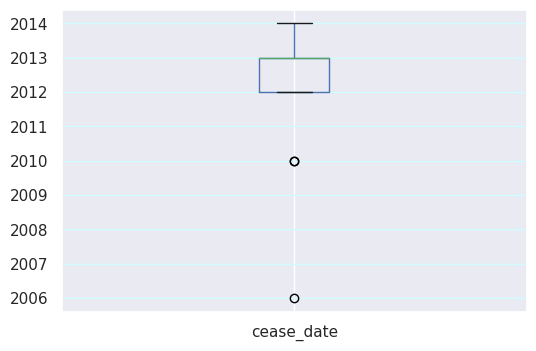

In [764]:
dete_resignations['cease_date'].plot(kind='box').grid(color='xkcd:pale blue', axis='y')

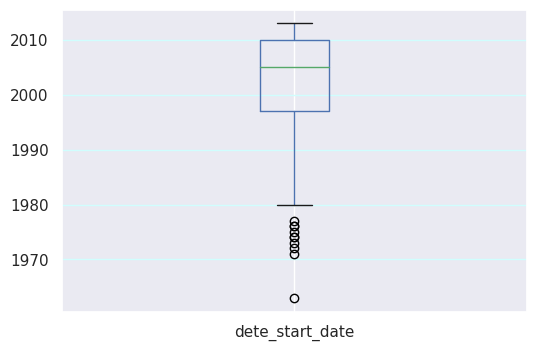

In [765]:
dete_resignations['dete_start_date'].plot(kind='box').grid(color='xkcd:pale blue', axis='y')


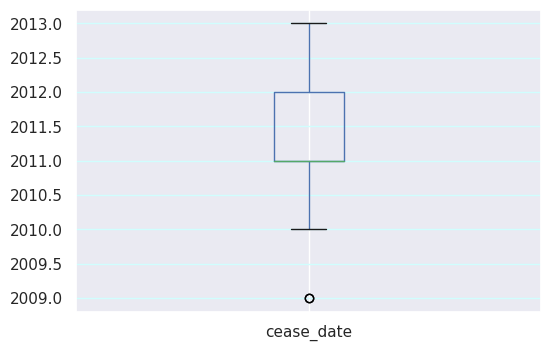

In [766]:
tafe_resignations['cease_date'].plot(kind='box').grid(color='xkcd:pale blue', axis='y')


Below are things we found:

* The years in both dataframes are misaligned. The `tafe_survey_updated` dataframe contains some cease dates in 2009, but the `dete_survey_updated` dataframe does not.
* The `tafe_survey_updated` dataframe also contains many more cease dates in 2010 than the `dete_survey_updaed` dataframe.

Because we aren't concerned with analyzing the results by year, we'll leave them as is.

## 8. Create a New Column

Now that we've verified the years in the `dete_resignations` dataframe, we'll use them to create a new column. Recall that our end goal is to answer the following question:

* Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?

In the Human Resources field, the length of time an employee spent in a workplace is referred to as their years of service.

You may have noticed that the `tafe_resignations` dataframe already contains a "service" column, which we renamed to `institute_service`. In order to analyze both surveys together, we'll have to create a corresponding `institute_service` column in `dete_resignations`.

In [767]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']

## 7. Identify Dissatisfied Employees

Below are the columns we'll use to categorize employees as "dissatisfied" from each dataframe. If you disagree, feel free to modify them! Just make sure you explain why you made that decision.

**tafe_survey_updated:**
* `Contributing Factors. Dissatisfaction`
* `Contributing Factors. Job Dissatisfaction`

**dete_survey_updated:**
* `job_dissatisfaction`
* `dissatisfaction_with_the_department`
* `physical_work_environment`
* `lack_of_recognition`
* `lack_of_job_security`
* `work_location`
* `employment_conditions`
* `work_life_balance`
* `workload` 

If the employee indicated any of the factors above caused them to resign, we'll mark them as dissatisfied in a new column.

To create the new column, we'll do the following:

1. Convert the values in the `Contributing Factors. Dissatisfaction` and `Contributing Factors. Job Dissatisfaction` columns in the `tafe_resignations` dataframe to True, False, or NaN values.
2. If any of the columns listed above contain a True value, we'll add a True value to a new column named `dissatisfied`

To accomplish this, we'll use the DataFrame.any() method to do the following:

* Return True if any element in the selected columns above is True
* Return False if none of the elements in the selected columns above is True
* Return NaN if the value is NaN

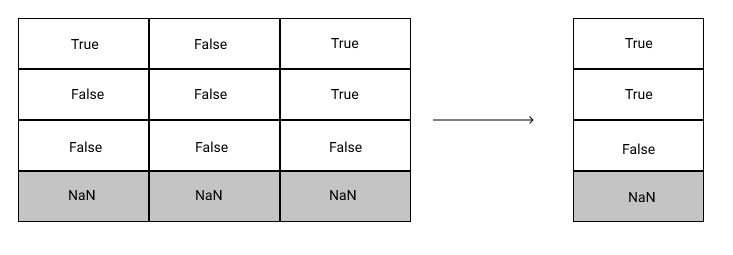

After our changes, the new `dissatisfied` column will contain just the following values:

* `True`: indicates a person resigned because they were dissatisfied with the job
* `False`: indicates a person resigned because of a reason other than dissatisfaction with the job
* `NaN`: indicates the value is missing

In [768]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [769]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [770]:
def update_vals(val):
    if pd.isnull(val):
        return np.nan
    if val == '-':
        return False
    else :
        return True 
    
tafe_resignations.loc[:, ['Contributing Factors. Dissatisfaction','Contributing Factors. Job Dissatisfaction']].applymap(update_vals)

,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
...,...,...
696,False,False
697,False,False
698,False,False
699,False,False


In [771]:
dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction',
'dissatisfaction_with_the_department',
'physical_work_environment',
'lack_of_recognition',
'lack_of_job_security',
'work_location',
'employment_conditions',
'work_life_balance',
'workload',
    
]].any(axis=1, skipna = False)
dete_resignations['dissatisfied'].value_counts()

False    162
True     149
Name: dissatisfied, dtype: int64

In [772]:
tafe_resignations['dissatisfied'] = (tafe_resignations[['Contributing Factors. Dissatisfaction',
                                                        'Contributing Factors. Job Dissatisfaction']]
                                     .applymap(update_vals).any(1, skipna=False)
                                    )
tafe_resignations['dissatisfied'].value_counts()

False    241
True      91
Name: dissatisfied, dtype: int64

In [773]:
dete_resignations_up = dete_resignations.copy()
tafe_resignations_up = tafe_resignations.copy()

## 8. Combine the Data

To recap, we've accomplished the following:

* Renamed our columns
* Dropped any data not needed for our analysis
* Verified the quality of our data
* Created a new `institute_service column`
* Cleaned the `Contributing Factors` columns
* Created a new column indicating if an employee resigned because they were dissatisfied in some way

Now, we're finally ready to combine our datasets! Our end goal is to aggregate the data according to the `institute_service` column. 

In [774]:
# Add new column institure to both datasets
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

In [775]:
#combined dataframe
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True, sort=False)
combined.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service,dissatisfied,institute,Institute,WorkArea,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,role_service
0,4.0,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,7,False,DETE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6.0,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN,18,True,DETE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9.0,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN,3,False,DETE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10.0,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN,15,True,DETE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12.0,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN,3,False,DETE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [776]:
combined.notnull().sum().sort_values()

torres_strait                                            0
south_sea                                                3
aboriginal                                               7
disability                                               8
nesb                                                     9
business_unit                                           32
classification                                         161
region                                                 265
role_start_date                                        271
dete_start_date                                        283
role_service                                           290
none_of_the_above                                      311
work_life_balance                                      311
traumatic_incident                                     311
ill_health                                             311
study/travel                                           311
relocation                                             3

In [777]:
# drop useless any columns with less than 500 non null values 
combined_updated = combined.dropna(thresh = 500, axis = 1) 
combined_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 651 non-null    float64
 1   separationtype     651 non-null    object 
 2   cease_date         635 non-null    float64
 3   position           598 non-null    object 
 4   employment_status  597 non-null    object 
 5   gender             592 non-null    object 
 6   age                596 non-null    object 
 7   institute_service  563 non-null    object 
 8   dissatisfied       643 non-null    object 
 9   institute          651 non-null    object 
dtypes: float64(2), object(8)
memory usage: 51.0+ KB


## 9. Clean the Service Column
Now that we've combined our dataframes, we're almost at a place where we can perform some kind of analysis! First, though, we'll have to clean up the `institute_service` column. This column is tricky to clean because it currently contains values in a couple different forms. 

In [778]:
combined_updated['institute_service'].value_counts()

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
20.0                   7
15.0                   7
10.0                   6
12.0                   6
14.0                   6
17.0                   6
22.0                   6
16.0                   5
18.0                   5
11.0                   4
24.0                   4
23.0                   4
19.0                   3
21.0                   3
39.0                   3
32.0                   3
25.0                   2
26.0                   2
28.0                   2
30.0                   2
36.0                   2
27.0                   1


To analyze the data, we'll convert these numbers into categories.
* **New**: Less than 3 years at a company
* **Experienced**: 3-6 years at a company
* **Established**: 7-10 years at a company
* **Veteran**: 11 or more years at a company

In [779]:
combined_updated = combined_updated.copy()
combined_updated['institute_service'] = combined_updated['institute_service'].astype(str)
combined_updated['institute_service'] = combined_updated['institute_service'].str.extract(r'(\d+)').astype(float)
print(combined_updated['institute_service'].value_counts())

1.0     159
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
17.0      6
10.0      6
12.0      6
14.0      6
22.0      6
16.0      5
18.0      5
24.0      4
23.0      4
39.0      3
19.0      3
21.0      3
32.0      3
28.0      2
36.0      2
25.0      2
30.0      2
26.0      2
29.0      1
38.0      1
42.0      1
27.0      1
41.0      1
35.0      1
49.0      1
34.0      1
33.0      1
31.0      1
Name: institute_service, dtype: int64


In [780]:
def category(val):
    if pd.isnull(val):
        return np.nan
    elif val<3:
        return 'New'
    elif 3 <= val <= 6:
        return 'Experienced'
    elif 7<= val <= 10:
        return 'Established'
    elif 11 <= val:
        return 'Veteran'

combined_updated['service_cat'] = combined_updated['institute_service'].apply(category)
print('Service Categories')
print(combined_updated['service_cat'].value_counts(dropna=False))

Service Categories
New            193
Experienced    172
Veteran        136
NaN             88
Established     62
Name: service_cat, dtype: int64


In [781]:
combined_updated['service_cat'] = combined_updated['institute_service'].apply(level)
combined_updated['service_cat'].value_counts()

New            276
Veteran        136
Experienced     89
Established     62
Name: service_cat, dtype: int64

## 10. Perform Initial Analysis

Now, let's finally do our first piece of analysis! We'll fill in missing values in the `dissatisfied` column and then aggregate the data to get you started, but note that we still have additional missing values left to deal with. This is meant to be an initial introduction to the analysis, not the final analysis.

Recall that the `dissatisfied` column consists of Boolean values, meaning they're either `True` or `False`. Methods such as the df.pivot_table() method actually treat Boolean values as integers, so a `True` value is considered to be 1 and a `False` value is considered to be 0. That means that we can aggregate the `dissatisfied` column and calculate the number of people in each group, the percentage of people in each group, etc.

In [782]:
combined_updated['dissatisfied'].value_counts(dropna = False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [783]:
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)
combined_updated['dissatisfied'].value_counts(dropna = False)

False    411
True     240
Name: dissatisfied, dtype: int64

In [784]:
dissatisfied_combined = combined_updated.pivot_table(index='service_cat', values='dissatisfied')
dissatisfied_combined

,dissatisfied
service_cat,
Established,0.516129
Experienced,0.404494
New,0.289855
Veteran,0.485294


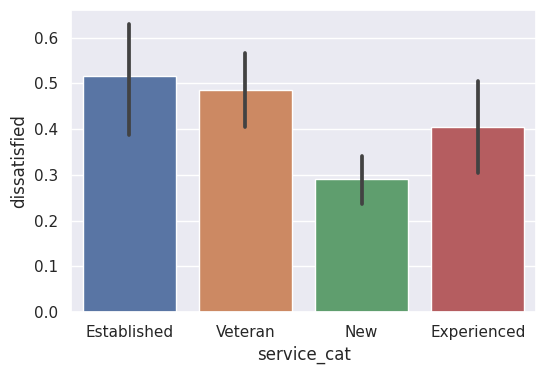

In [785]:
sns.set()
sns.barplot(data = combined_updated
            ,x = 'service_cat'
            ,y = 'dissatisfied'
            )


In this  project, we experienced that in order to extract any meaningful insights from our data, we had to perform many data cleaning tasks. In order to create one visualization (and not even the final one)

The conclusion from the final output is the more experienced you are the more dissatisfied you will be. The level of dissatisfaction is more similar for `New` and `Experienced` and both contain less dissatisfied employees. The level of dissatisfaction is also similar for `Veterain` and `Established`, and both contain the highest dissatisfied employees.


Our work here is far from done! Here are some further work:

* Decide how to handle the rest of the missing values. Then, aggregate the data according to the `service_cat` column again. How many people in each career stage resigned due to some kind of dissatisfaction?
* Clean the `age` column. How many people in each age group resgined due to some kind of dissatisfaction?
* Instead of analyzing the survey results together, analyze each survey separately. Did more employees in the DETE survey or TAFE survey end their employment because they were dissatisfied in some way?
